Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [136]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [137]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [138]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

točnost modela:  1.0


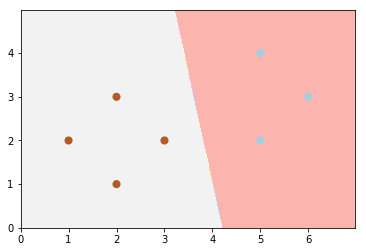

In [139]:
ridge=RidgeClassifier(alpha=0).fit(seven_X,seven_y)
mlutils.plot_2d_clf_problem(seven_X,seven_y,ridge.predict)
print 'točnost modela: ',accuracy_score(y_pred=ridge.predict(seven_X),y_true=seven_y)


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

točnost modela:  1.0


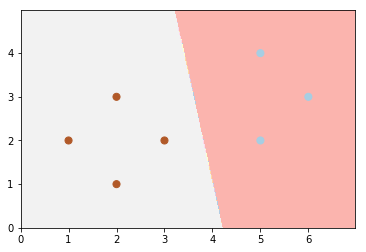

In [140]:
linear=LinearRegression().fit(seven_X,seven_y)
mlutils.plot_2d_clf_problem(seven_X,seven_y,lambda x : linear.predict(x) >= 0.5)
yPredict=[]
for i in linear.predict(seven_X):
    if i>=0.5:
        yPredict.append(1)
    else:
        yPredict.append(0)
print 'točnost modela: ',accuracy_score(y_pred=yPredict,y_true=seven_y)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [141]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

točnost modela:  0.875


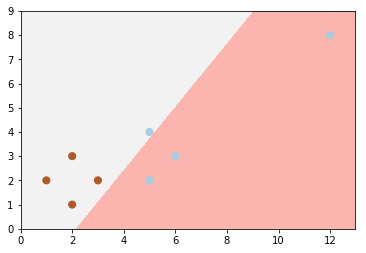

In [142]:
ridge=RidgeClassifier(alpha=0).fit(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,ridge.predict)
print 'točnost modela: ',accuracy_score(y_pred=ridge.predict(outlier_X),y_true=outlier_y)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [143]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

točnost modela:  0.875


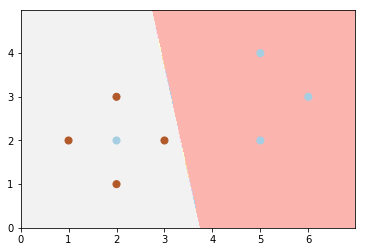

In [144]:
ridge=RidgeClassifier(alpha=0).fit(unsep_X,unsep_y)
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,ridge.predict)
print 'točnost modela: ',accuracy_score(y_pred=ridge.predict(unsep_X),y_true=unsep_y)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [145]:
from sklearn.datasets import make_classification

točnost modela  1 : 0.98
točnost modela  2 : 0.82
točnost modela  3 : 0.92


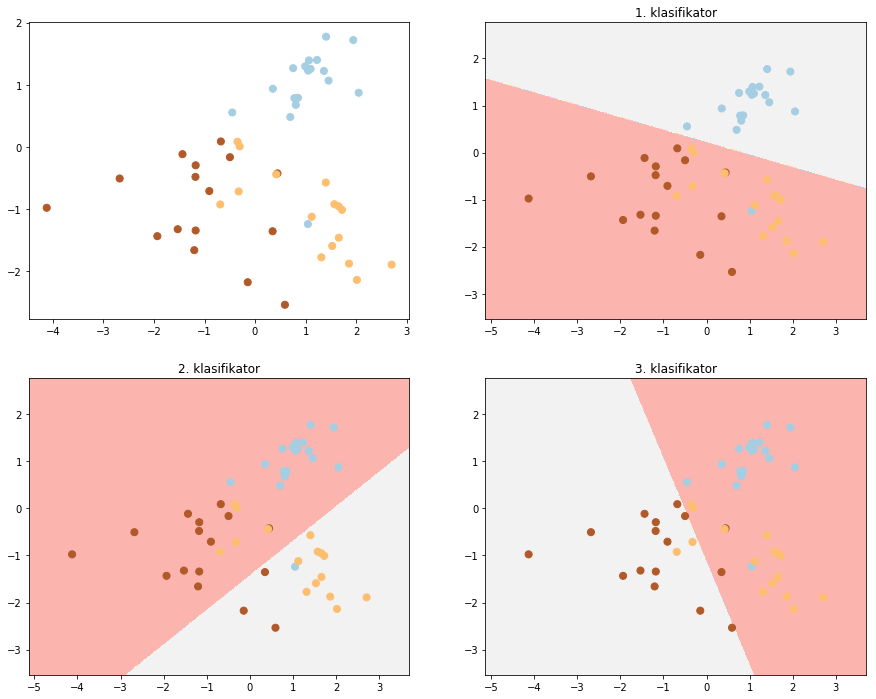

In [146]:
X,y=make_classification(n_samples=50,n_features=2, n_informative=2, n_redundant=0, n_classes=3,n_clusters_per_class=1)
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
mlutils.plot_2d_clf_problem(X,y)
decisionFunction=[]
for i in range(3):
    yBinary=[]
    for j in y:
        if i==j:
            yBinary.append(1)
        else:
            yBinary.append(0)
    ridge=RidgeClassifier(alpha=0).fit(X,yBinary)
    decisionFunction.append(ridge.decision_function)
    plt.subplot(2,2,i+2)
    plt.title('%d. klasifikator' % (i+1))
    mlutils.plot_2d_clf_problem(X,y,ridge.predict)
    print 'točnost modela ',i+1,':',accuracy_score(y_pred=ridge.predict(X),y_true=yBinary)
plt.show()   

točnost modela:  0.5


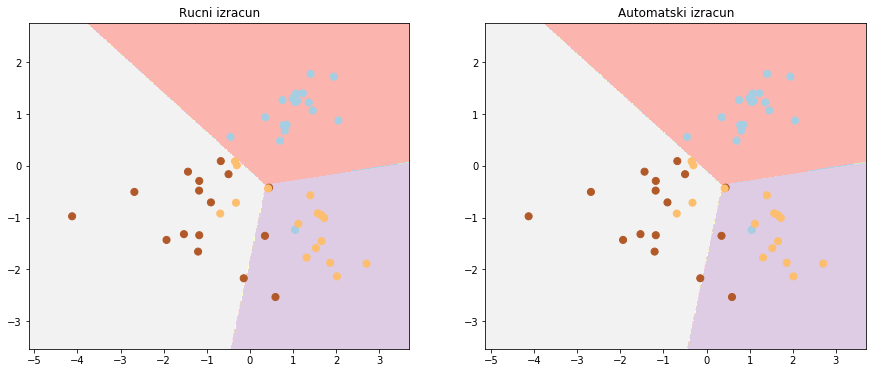

In [147]:
def argmaxH(X):
    return np.array([np.argmax([decisionFunction[0](x.reshape(1, -1)),decisionFunction[1](x.reshape(1, -1)),\
                                decisionFunction[2](x.reshape(1, -1))]) for x in X])
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Rucni izracun')
mlutils.plot_2d_clf_problem(X,y,argmaxH)

plt.subplot(1,2,2)
plt.title('Automatski izracun')
ridge=RidgeClassifier(alpha=0).fit(X,y)
mlutils.plot_2d_clf_problem(X,y,ridge.predict)
print 'točnost modela: ',accuracy_score(y_pred=ridge.predict(unsep_X),y_true=unsep_y)
plt.show()

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

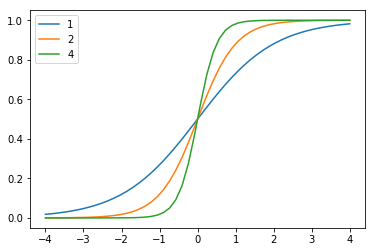

In [148]:
alphas=[1,2,4]
x=np.linspace(-4,4)
def sigm(x,alpha=1):
    return 1/(1+np.exp(-alpha*x))
for alpha in alphas:
    plt.plot(x,sigm(x,alpha),label=alpha)
plt.legend()
    
    

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [149]:
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import norm
def lr_h(x,w):
    return sigm(np.dot(x,w))

def cross_entropy_error(X,y,w,alpha=0):
    rez=0
    size=0
    for i,x in enumerate(X):
        h=lr_h(x,w)
        rez+=-y[i]*np.log(h)-(1-y[i])*np.log(1-h)
        size+=1
    rez= rez/size+norm(w[:1])*norm(w[:1])*alpha/2
    return rez
        
    
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    mdesign=PolynomialFeatures(1).fit_transform(X)
    w=np.ndarray((mdesign.shape[1],1))
    for i,j in enumerate(w):
        w[i]=0
    iteration =0
    trace_array=[]
    while iteration < max_iter:
        lastError = cross_entropy_error(mdesign,y,w)
        hy=[]
        for i,j in zip(lr_h(mdesign,w),y):
            hy.append(i-j)
        hy=np.array(hy)
        delta_w = hy.T.dot(mdesign)
        w[1:] = w[1:] * (1 - eta * alpha)         
        w -= eta * delta_w.T
        if trace:
            trace_array.append(np.copy(w))
        if(np.abs(cross_entropy_error(mdesign,y,w)-lastError)<epsilon):
            break;
        iteration+=1
        #print w, cross_entropy_error(mdesign,y,w)
    print "Broj iteracija treniranja:", (iteration+1), ", pogreska unakrsne entropije:", cross_entropy_error(mdesign, y, w)
    if trace:
        return w,trace_array
    else:
        return w
print lr_train(seven_X,seven_y,max_iter=2000)
    

Broj iteracija treniranja: 947 , pogreska unakrsne entropije: [ 0.13521873]
[[ 4.45449454]
 [-1.71089242]
 [ 0.68413507]]


#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Broj iteracija treniranja: 947 , pogreska unakrsne entropije: [ 0.13521873]


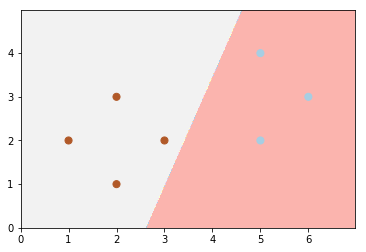

In [150]:
w,trace= lr_train(seven_X, seven_y, trace=True)
def decision(x):
    mdesign=PolynomialFeatures(1).fit_transform(x)
    return lr_h(mdesign,w)>=0.5
mlutils.plot_2d_clf_problem(seven_X, seven_y, decision)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

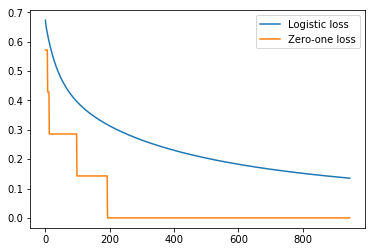

In [151]:
logistic_loss=[]
zero_one_loss=[]
mdesign=PolynomialFeatures(1).fit_transform(seven_X)
for i in trace:
    yPredict=[1 if x>=0.5 else 0 for x in lr_h(mdesign,i)]
    logistic_loss.append(cross_entropy_error(mdesign,seven_y,i))
    zero_one_loss.append(1-accuracy_score(seven_y,yPredict))

length=len(trace)
plt.plot(range(length), logistic_loss, label='Logistic loss')
plt.plot(range(length), zero_one_loss, label='Zero-one loss')
plt.legend()
plt.show()    

Broj iteracija treniranja: 1142 , pogreska unakrsne entropije: [ 0.18842638]
Broj iteracija treniranja: 947 , pogreska unakrsne entropije: [ 0.13521873]
Broj iteracija treniranja: 511 , pogreska unakrsne entropije: [ 0.06379986]
Broj iteracija treniranja: 378 , pogreska unakrsne entropije: [ 0.04604471]


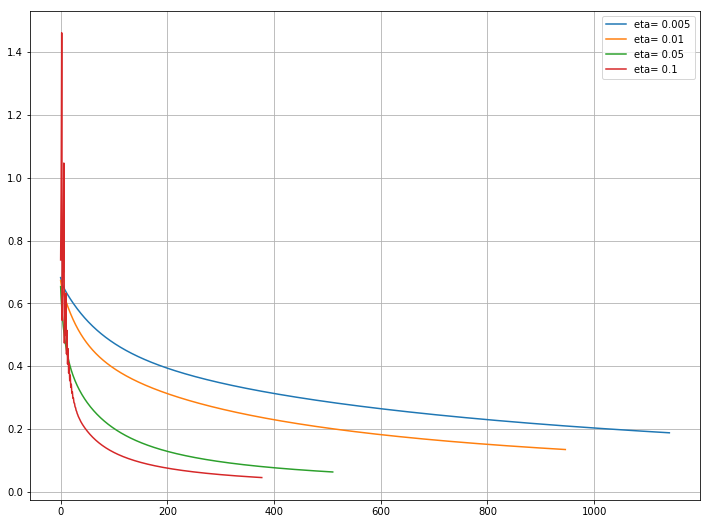

In [152]:
etas=[0.005,0.01,0.05,0.1]
mdesign=PolynomialFeatures(1).fit_transform(seven_X)
plt.figure(figsize=(12,9))
for eta in etas:
    finalw,trace=lr_train(seven_X, seven_y, trace=True, eta=eta)
    logistic_loss=[]
    for w in trace:
        logistic_loss.append(cross_entropy_error(mdesign,seven_y,w))
    length=len(trace)
    plt.plot(range(length), logistic_loss, label='eta= '+str(eta))
plt.grid()
plt.legend()
plt.show()
    


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

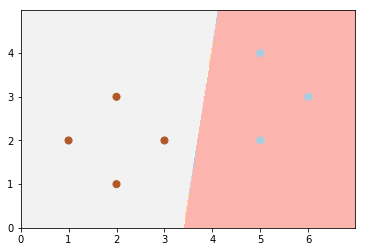

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100).fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, model.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

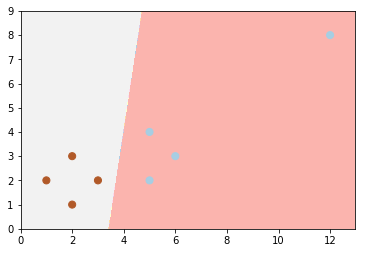

In [154]:
model = LogisticRegression(C=100).fit(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, model.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


Broj iteracija treniranja: 947 , pogreska unakrsne entropije: [ 0.13521873]


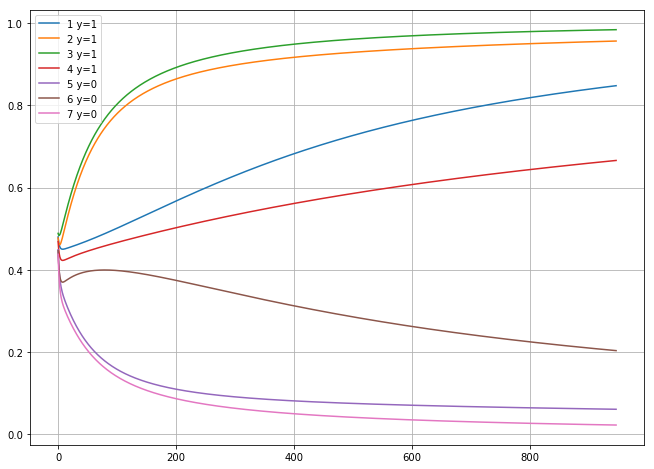

In [155]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

wfinal, trace= lr_train(seven_X,seven_y,trace=True)
mdesign=PolynomialFeatures(1).fit_transform(seven_X)
n=seven_y.shape[0]
hx=[[] for i in range(n)]
m=wfinal.shape[0]
weights=[[] for i in range(m)]
for w in trace:
    hi=lr_h(mdesign,w)
    for j in range(m):
        weights[j].append(w[j])
    for i in range(n):
        hx[i].append(hi[i])

trace_len=len(trace)
plt.figure(figsize=(11,8))
for i in range(n):
    plt.plot(range(trace_len),hx[i],label=str(i+1)+' y='+str(seven_y[i]))
plt.grid()
plt.legend()
plt.show()



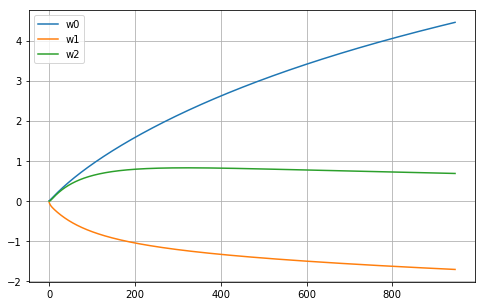

In [156]:
plt.figure(figsize=(8,5))
for i in range(m):
    plt.plot(range(trace_len),weights[i],label='w'+str(i))
plt.grid()
plt.legend()
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Broj iteracija treniranja: 454 , pogreska unakrsne entropije: [ 0.40635268]


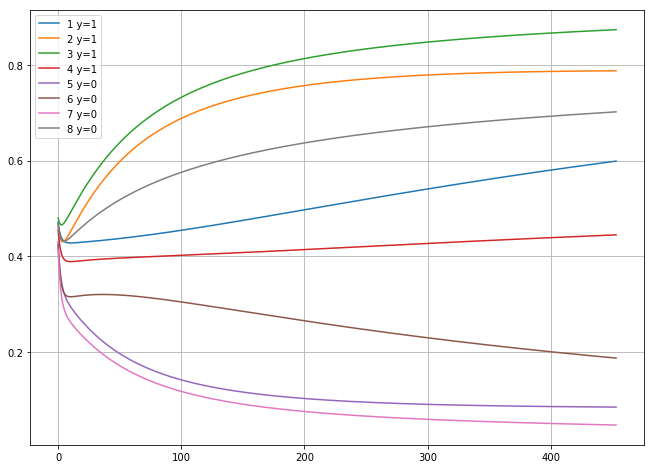

In [157]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

wfinal, trace= lr_train(unsep_X,unsep_y,trace=True)
mdesign=PolynomialFeatures(1).fit_transform(unsep_X)
n=unsep_y.shape[0]
hx=[[] for i in range(n)]
m=wfinal.shape[0]
weights=[[] for i in range(m)]
for w in trace:
    hi=lr_h(mdesign,w)
    for j in range(m):
        weights[j].append(w[j])
    for i in range(n):
        hx[i].append(hi[i])

trace_len=len(trace)
plt.figure(figsize=(11,8))
for i in range(n):
    plt.plot(range(trace_len),hx[i],label=str(i+1)+' y='+str(unsep_y[i]))
plt.grid()
plt.legend()
plt.show()

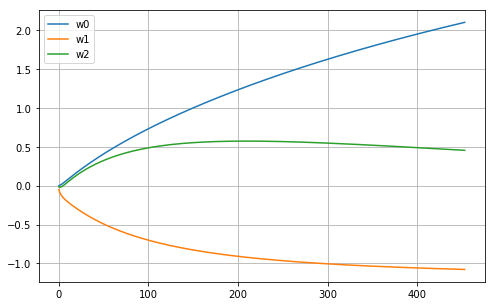

In [158]:
plt.figure(figsize=(8,5))
for i in range(m):
    plt.plot(range(trace_len),weights[i],label='w'+str(i))
plt.grid()
plt.legend()
plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [159]:
from numpy.linalg import norm

Broj iteracija treniranja: 947 , pogreska unakrsne entropije: [ 0.13521873]
Broj iteracija treniranja: 804 , pogreska unakrsne entropije: [ 0.20193263]
Broj iteracija treniranja: 405 , pogreska unakrsne entropije: [ 0.43270691]
Broj iteracija treniranja: 4 , pogreska unakrsne entropije: [ 0.6741678]


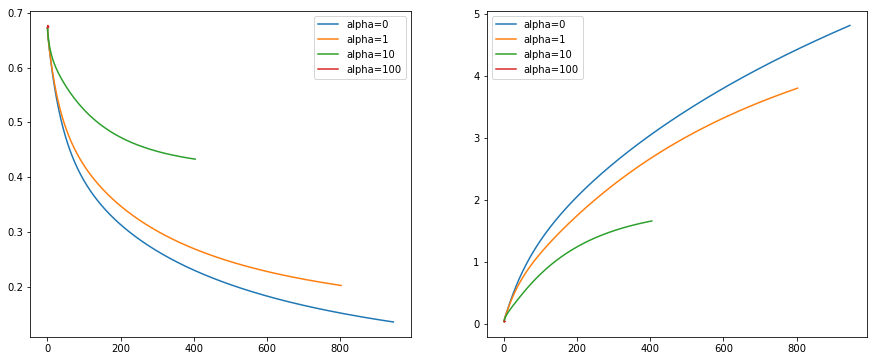

In [160]:
plt.figure(figsize=(15,6))
alphas=[0,1,10,100]
for alpha in alphas:
    wfinal, trace= lr_train(seven_X,seven_y,trace=True,alpha=alpha)
    mdesign=PolynomialFeatures(1).fit_transform(seven_X)
    logistic_loss=[]
    norms=[]
    for w in trace:
        logistic_loss.append(cross_entropy_error(mdesign,seven_y,w,))
        norms.append(norm(w))
    trace_length=len(trace)
    plt.subplot(1,2,1)
    plt.plot(range(trace_length),logistic_loss,label='alpha='+str(alpha))
    plt.legend()
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(range(trace_length),norms,label='alpha='+str(alpha))
    plt.legend()
    plt.grid()
plt.show()
    

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [161]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

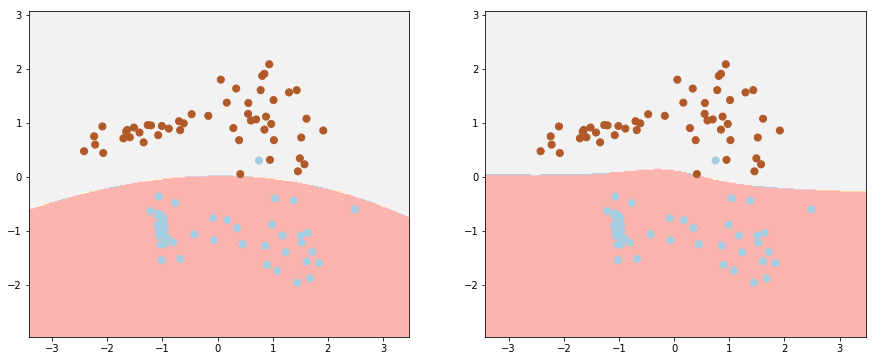

In [162]:
X, y = make_classification( n_features=2, n_redundant=0)
poly1=PolynomialFeatures(2)
poly2=PolynomialFeatures(3)
mdesign1=poly1.fit_transform(X)
mdesign2=poly2.fit_transform(X)
model1 = LogisticRegression(C=1).fit(mdesign1, y)
model2 = LogisticRegression(C=1).fit(mdesign2, y)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
mlutils.plot_2d_clf_problem(X, y, lambda x : model1.predict(poly1.transform(x)))
plt.subplot(1,2,2)
mlutils.plot_2d_clf_problem(X, y, lambda x : model2.predict(poly2.transform(x)))
plt.show()


**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?